In [2]:
import pandas as pd 
df = pd.read_csv("stocks.csv")
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df['Month'] = pd.to_datetime(df["Month"])
df.set_index('Month',inplace=True)
print(df.head())
print("\n index type\n",type(df.index))


            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

 index type
 <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [5]:
# to check the info the data 
df.info()
## to check the missing values :
print(df.isnull().sum())

# to check the date range ! 

print(df.index.min())
print(df.index.max())
print("total months",len(df))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
Passengers    0
dtype: int64
1949-01-01 00:00:00
1960-12-01 00:00:00
total months 144


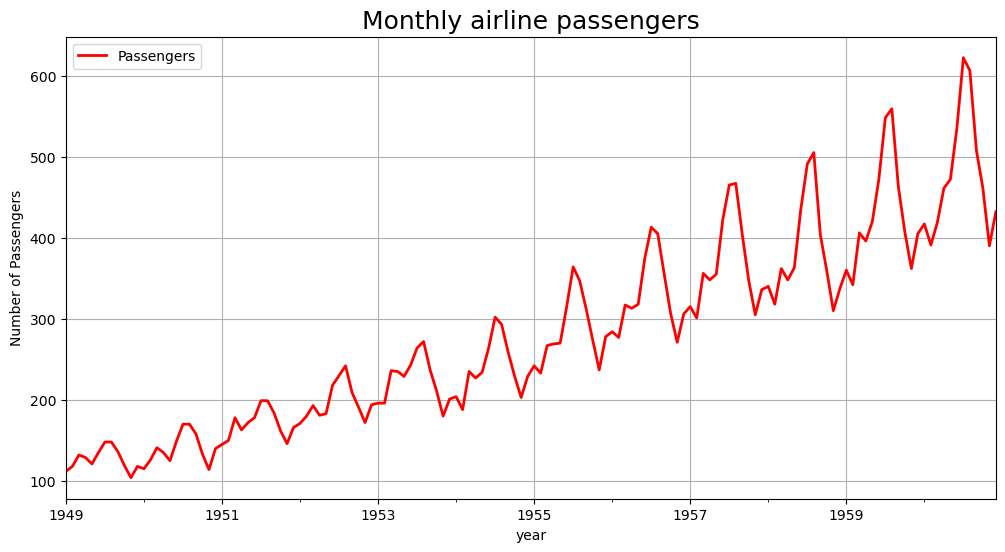

In [6]:
import matplotlib.pyplot as plt # for visualizing the data ! the clean data 

df.plot(figsize=(12,6), linewidth= 2 ,color='red')
plt.title("Monthly airline passengers",fontsize = 18 )
plt.ylabel("Number of Passengers")
plt.xlabel("year")
plt.grid(True)
plt.show()

In [7]:
## we can slice the time series using date strings !
## in time series set the freqency in the sorted form like MS month start ! 
df.index.freq = 'MS'
print(df.loc['1950'])
print(df.loc['1955'])

            Passengers
Month                 
1950-01-01         115
1950-02-01         126
1950-03-01         141
1950-04-01         135
1950-05-01         125
1950-06-01         149
1950-07-01         170
1950-08-01         170
1950-09-01         158
1950-10-01         133
1950-11-01         114
1950-12-01         140
            Passengers
Month                 
1955-01-01         242
1955-02-01         233
1955-03-01         267
1955-04-01         269
1955-05-01         270
1955-06-01         315
1955-07-01         364
1955-08-01         347
1955-09-01         312
1955-10-01         274
1955-11-01         237
1955-12-01         278


In [8]:
## for extracting date components 
df['year'] = df.index.year
df['MonthName'] = df.index.month_name()
print(df.head())
## to print avareage monthly passengers we can do ! 
print(df.groupby('MonthName')["Passengers"].mean().round(2).sort_values(ascending= False))

            Passengers  year MonthName
Month                                 
1949-01-01         112  1949   January
1949-02-01         118  1949  February
1949-03-01         132  1949     March
1949-04-01         129  1949     April
1949-05-01         121  1949       May
MonthName
July         351.33
August       351.08
June         311.67
September    302.42
May          271.83
March        270.17
April        267.08
October      266.58
December     261.83
January      241.75
February     235.00
November     232.83
Name: Passengers, dtype: float64


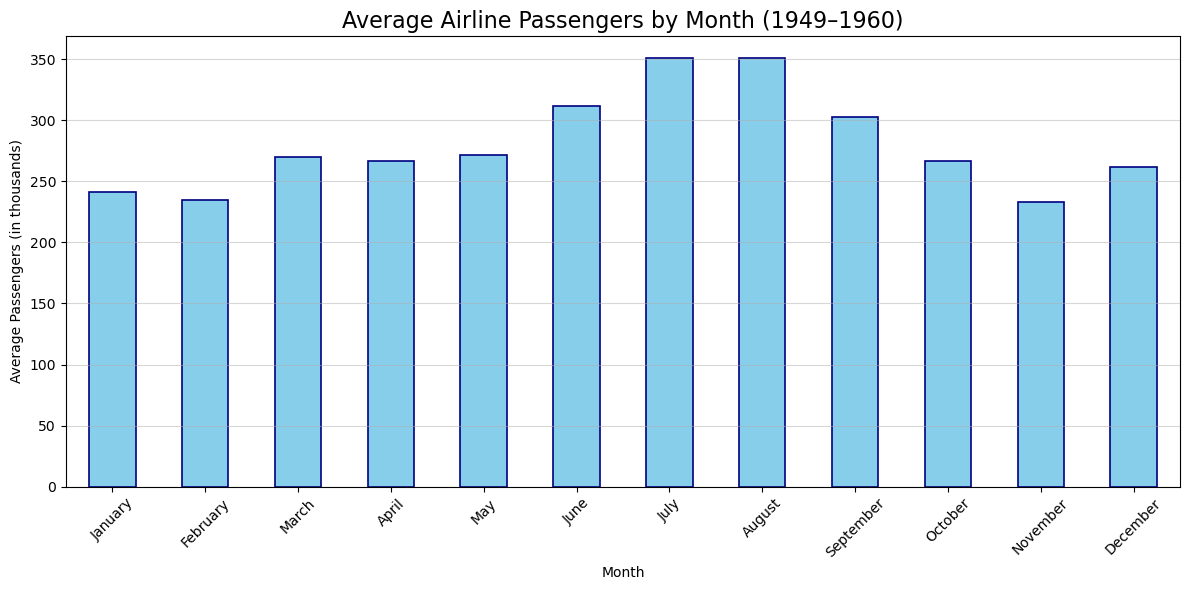

In [9]:
##plot the seasonal Pattern ! 
import matplotlib.pyplot as plt

monthly_avg = df.groupby("MonthName")['Passengers'].mean()

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

monthly_avg = monthly_avg.reindex(month_order)

plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar', color='skyblue', edgecolor='navy', linewidth=1.2)
plt.title("Average Airline Passengers by Month (1949–1960)", fontsize=16)
plt.ylabel("Average Passengers (in thousands)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
## now we will resample the data ! 
yearly_avg = df['Passengers'].resample('Y').mean()
print(yearly_avg.round(2))
print(yearly_avg.head(3).round(2))
print(yearly_avg.tail(3).round(1))

Month
1949-12-31    126.67
1950-12-31    139.67
1951-12-31    170.17
1952-12-31    197.00
1953-12-31    225.00
1954-12-31    238.92
1955-12-31    284.00
1956-12-31    328.25
1957-12-31    368.42
1958-12-31    381.00
1959-12-31    428.33
1960-12-31    476.17
Freq: A-DEC, Name: Passengers, dtype: float64
Month
1949-12-31    126.67
1950-12-31    139.67
1951-12-31    170.17
Freq: A-DEC, Name: Passengers, dtype: float64
Month
1958-12-31    381.0
1959-12-31    428.3
1960-12-31    476.2
Freq: A-DEC, Name: Passengers, dtype: float64


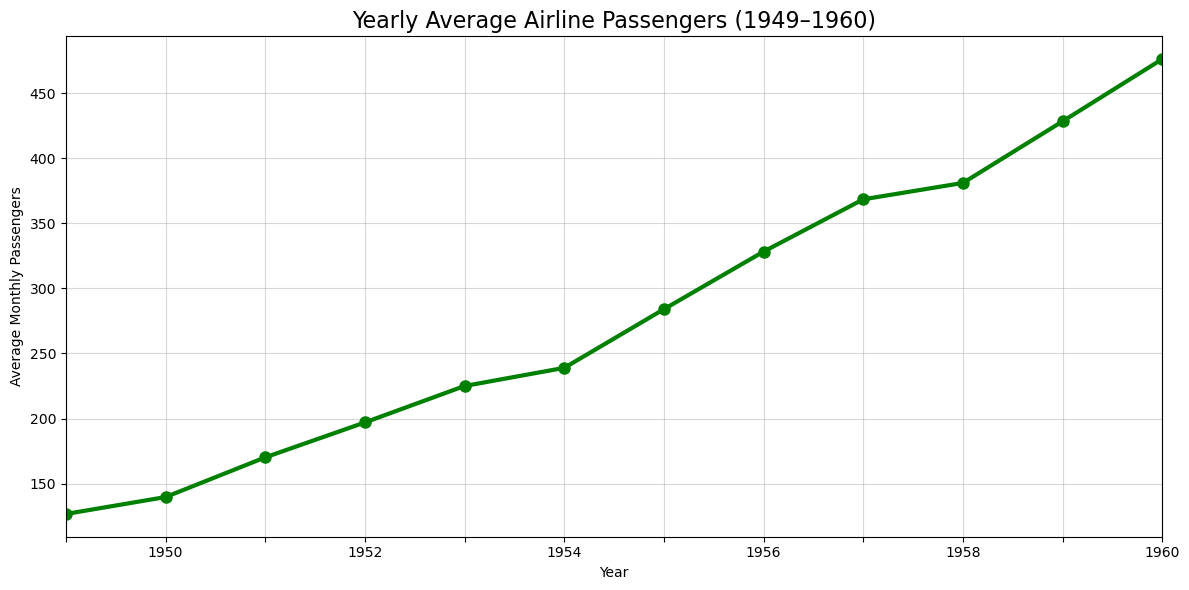

In [11]:
yearly_avg.plot(
    kind='line',
    figsize=(12, 6),         
    linewidth=3,
    color='green',
    marker='o',                
    markersize=8               
)

plt.title("Yearly Average Airline Passengers (1949–1960)", fontsize=16)  # ✅ Use dash, not underscore
plt.ylabel("Average Monthly Passengers")
plt.xlabel("Year")
plt.grid(True, alpha=0.5)
plt.xticks(yearly_avg.index, rotation=0)
plt.tight_layout()
plt.show()

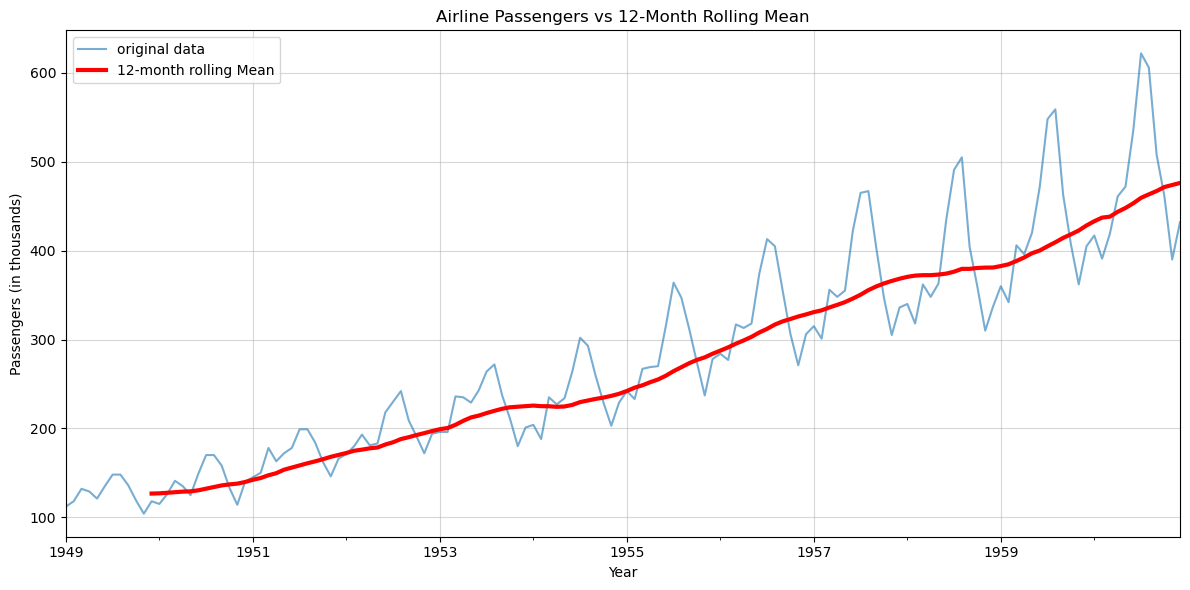

In [19]:
## rolling mean 
df['Rolling mean'] = df['Passengers'].rolling(window=12).mean()
df['Passengers'].plot(figsize=(12,6),alpha= 0.6,label = "original data")
df["Rolling mean"].plot(linewidth=3,label = '12-month rolling Mean',color= 'red')
plt.title("Airline Passengers vs 12-Month Rolling Mean")
plt.ylabel("Passengers (in thousands)")
plt.xlabel("Year")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

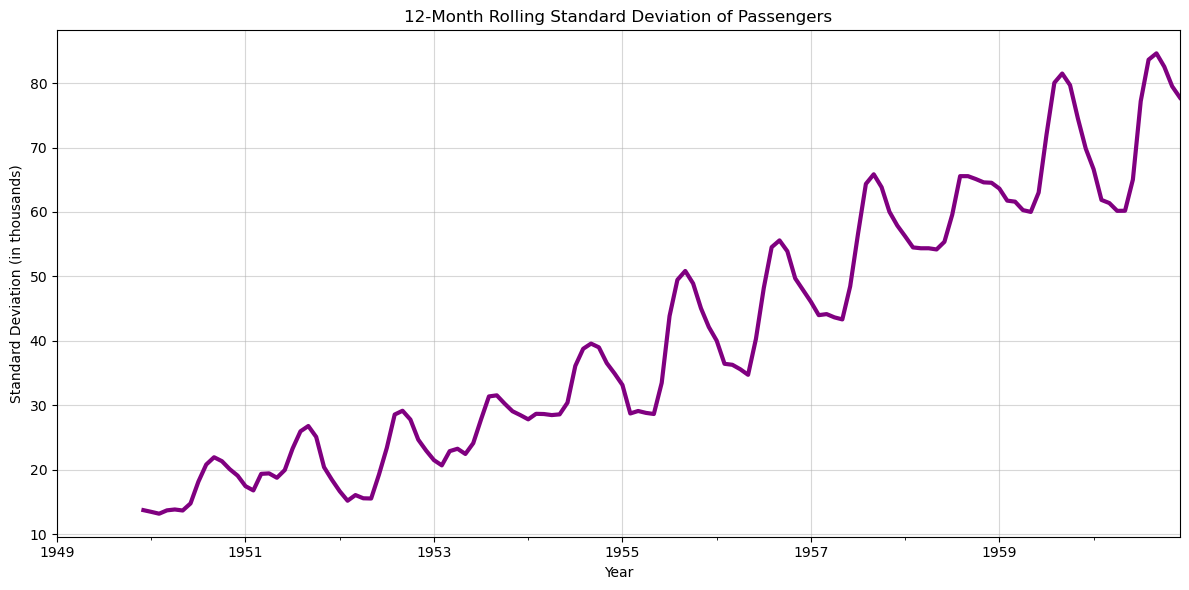

In [14]:
## now we will compute the standard deviation !
df['Rolling_std'] = df["Passengers"].rolling(window=12).std()
## now just plot like normal 
df['Rolling_std'].plot(figsize=(12, 6), linewidth=3, color='purple')
plt.title("12-Month Rolling Standard Deviation of Passengers")
plt.ylabel("Standard Deviation (in thousands)")
plt.xlabel("Year")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

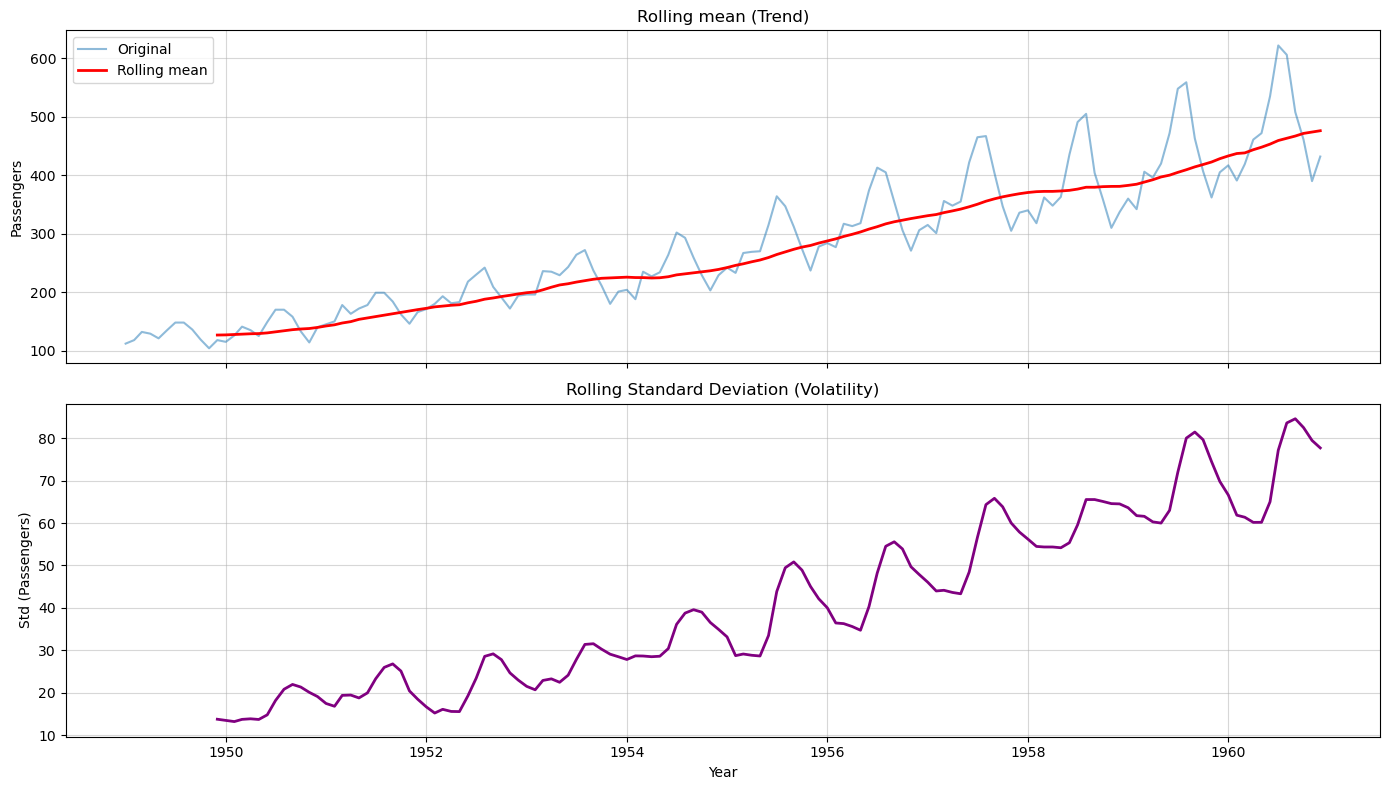

In [23]:
## now we will plot both together to check the comparison !
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
## top plot : rolling men 
ax1.plot(df["Passengers"], alpha=0.5, label='Original')
ax1.plot(df['Rolling mean'], color='red', linewidth=2, label='Rolling mean')
ax1.set_title("Rolling mean (Trend)")
ax1.set_ylabel("Passengers")
ax1.legend()
ax1.grid(True, alpha=0.5)

## this plot will be rolling std 
ax2.plot(df['Rolling_std'], color='purple', linewidth=2)  # Fixed: was 'Rolling_Std' but you used space
ax2.set_title("Rolling Standard Deviation (Volatility)")
ax2.set_ylabel("Std (Passengers)")
ax2.set_xlabel("Year")
ax2.grid(True, alpha=0.5)

# layout 
plt.tight_layout()
plt.show()

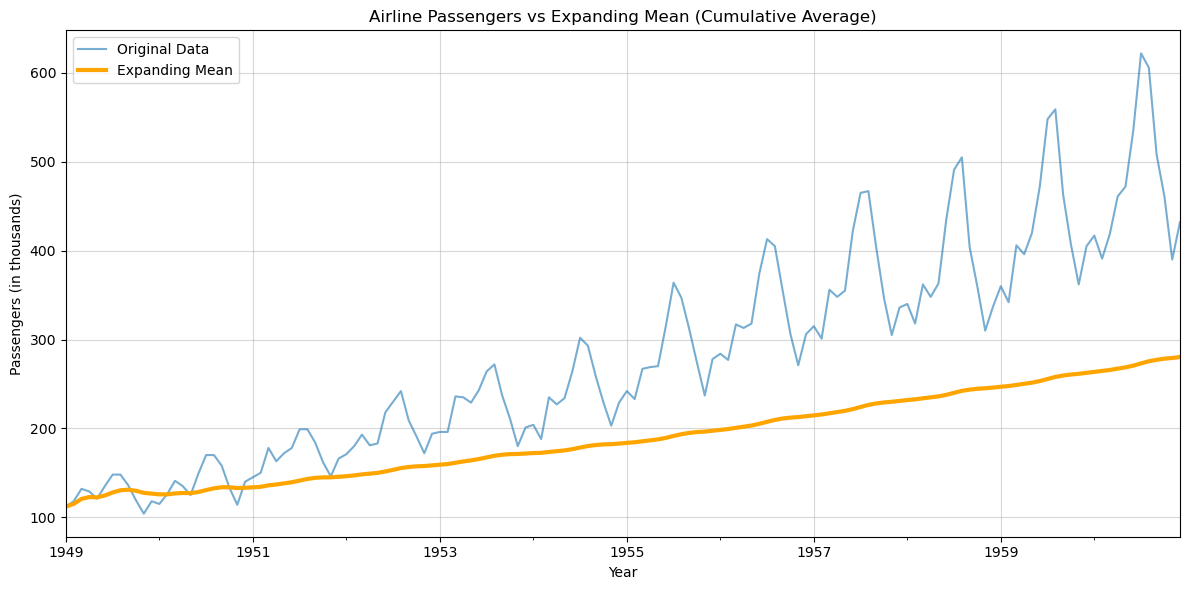

In [25]:
# commulative mean !
df['Expanding_mean'] = df['Passengers'].expanding().mean()
# orignal data ! 
df['Passengers'].plot(figsize=(12, 6), alpha=0.6, label='Original Data')
## now the expanding mmean !
df['Expanding_mean'].plot(linewidth=3, color='orange', label='Expanding Mean')
plt.title("Airline Passengers vs Expanding Mean (Cumulative Average)")
plt.ylabel("Passengers (in thousands)")
plt.xlabel("Year")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

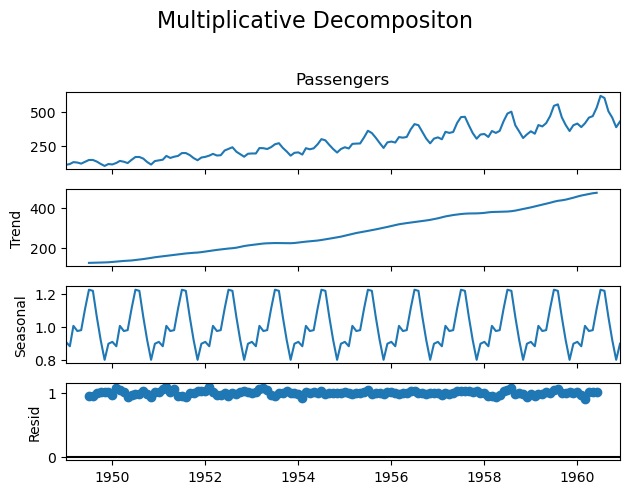

In [26]:
## time series decomposition !
#Now we’ll break down the Air Passengers series into its core components:
#Trend → long-term growth
#Seasonal → repeating yearly pattern
#Residual → random noise or irregularities

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Passengers"],model = 'multiplicatve',period=12)

# plot all components 
result.plot()
plt.suptitle("Multiplicative Decompositon" ,fontsize=16,y =1.02)
plt.tight_layout()
plt.show()


In [28]:
print(type(result.trend))
print(result.trend.head())

<class 'pandas.core.series.Series'>
Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Freq: MS, Name: trend, dtype: float64


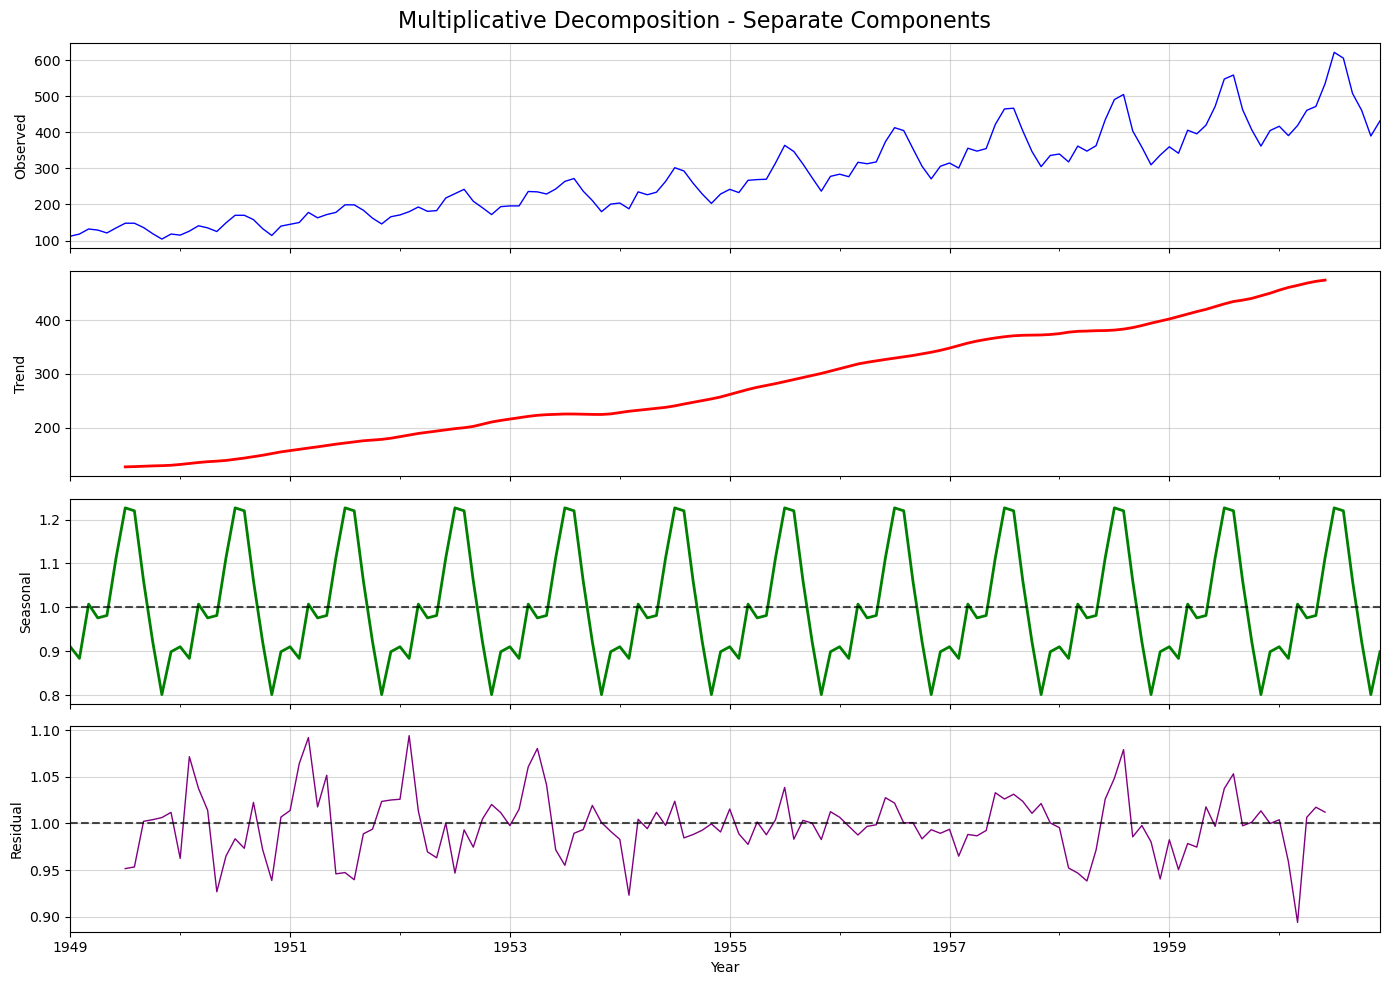

In [ ]:
# Step 16: Plot each component separately
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Observed
result.observed.plot(ax=axes[0], color='blue', linewidth=1)
axes[0].set_ylabel("Observed")
axes[0].grid(True, alpha=0.5)

# Trend
result.trend.plot(ax=axes[1], color='red', linewidth=2)
axes[1].set_ylabel("Trend")
axes[1].grid(True, alpha=0.5)

# Seasonal
result.seasonal.plot(ax=axes[2], color='green', linewidth=2)
axes[2].set_ylabel("Seasonal")
axes[2].axhline(1.0, color='black', linestyle='--', alpha=0.7)  
axes[2].grid(True, alpha=0.5)

# Residual
result.resid.plot(ax=axes[3], color='purple', linewidth=1)
axes[3].set_ylabel("Residual")

axes[3].axhline(1.0, color='black', linestyle='--', alpha=0.7)
axes[3].grid(True, alpha=0.5)
axes[3].set_xlabel("Year")

plt.suptitle("Multiplicative Decomposition - Separate Components", fontsize=16)
plt.tight_layout()
plt.show()